In [107]:
##basic libraries
import pandas as pd
import numpy as np
import pickle
import warnings
warnings.filterwarnings('ignore')

In [108]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score


In [109]:
## Taking  data from movies
df_movie=pd.read_csv('movies.csv', sep = '::', encoding='latin-1')
df_movie.columns =['MovieIDs','MovieName','Category']
df_movie.dropna(inplace=True)
df_movie.head()


,MovieIDs,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [110]:
##making category a numeriacal value
df_movie['gener']=df_movie['Category'].str.split('|')
df_movie.drop('Category', inplace=True,axis=1)
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

df_movie = df_movie.join(
    pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df_movie.pop('gener')),
                index=df_movie.index,
                columns=mlb.classes_))
df_movie.head()

,MovieIDs,MovieName,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,Heat (1995),1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [111]:
## Taking Rating Data
df_rating=pd.read_csv(r'C:\Users\asus\OneDrive\Desktop\data science\archive (4)\ratings.csv', sep = '::', encoding='latin-1')
df_rating.columns =['ID','MovieID','Ratings','TimeStamp']
df_rating.dropna(inplace=True)
df_rating.head()

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [112]:
## Taking the user data
df_user=pd.read_csv('users.csv', sep = '::', encoding='latin-1')
df_user.columns =['UserID','Gender','Age','Occupation','Zip-code']
df_user.dropna(inplace=True)
df_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [113]:
##Combining whole Dataset
df = pd.concat([df_movie, df_rating,df_user], axis=1)
df.dropna(inplace=True)
df.head()

,MovieIDs,MovieName,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Western,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1,1197,3,978302268,6.0,F,50.0,9.0,55117


In [114]:
## getting info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3882 entries, 0 to 3881
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype             
---  ------       --------------  -----             
 0   MovieIDs     3882 non-null   float64           
 1   MovieName    3882 non-null   object            
 2   Action       3882 non-null   Sparse[float64, 0]
 3   Adventure    3882 non-null   Sparse[float64, 0]
 4   Animation    3882 non-null   Sparse[float64, 0]
 5   Children's   3882 non-null   Sparse[float64, 0]
 6   Comedy       3882 non-null   Sparse[float64, 0]
 7   Crime        3882 non-null   Sparse[float64, 0]
 8   Documentary  3882 non-null   Sparse[float64, 0]
 9   Drama        3882 non-null   Sparse[float64, 0]
 10  Fantasy      3882 non-null   Sparse[float64, 0]
 11  Film-Noir    3882 non-null   Sparse[float64, 0]
 12  Horror       3882 non-null   Sparse[float64, 0]
 13  Musical      3882 non-null   Sparse[float64, 0]
 14  Mystery      3882 non-null   Sparse[floa

In [115]:
## one hot encoding of gender
e= OneHotEncoder()
f=e.fit_transform(df[['Gender']])
sf= pd.DataFrame(f.toarray(),columns=e.get_feature_names_out())
df1=pd.concat([df, sf], axis=1)
df1.drop(['Gender'], axis =1, inplace=True)

<AxesSubplot:>

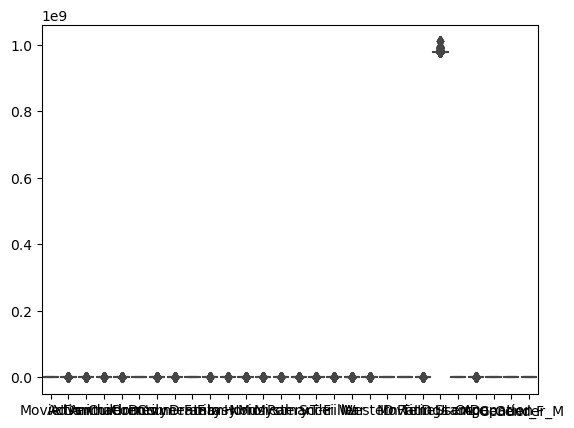

In [116]:
sns.boxplot(data= df1)

In [117]:
## corelation for main matrix
corr_matrix = df1.corr()['Ratings']
corr_matrix.sort_values()

UserID        -0.153069
MovieIDs      -0.152805
ID            -0.150231
MovieID       -0.071523
Horror        -0.043599
Action        -0.038142
War           -0.035338
Mystery       -0.032505
Sci-Fi        -0.028361
Age           -0.016888
Adventure     -0.015309
Thriller      -0.015050
Romance       -0.011883
TimeStamp     -0.008594
Gender_M      -0.007760
Western       -0.005712
Animation     -0.003500
Comedy        -0.002198
Occupation    -0.001186
Musical       -0.000026
Gender_F       0.007760
Children's     0.013038
Fantasy        0.014007
Documentary    0.020730
Drama          0.023313
Film-Noir      0.029527
Crime          0.037871
Ratings        1.000000
Name: Ratings, dtype: float64

In [118]:
## making x dataset
columns1=['MovieID','Age','Occupation','Gender_F','Gender_M','UserID','MovieIDs','UserID']
columns2=list(df_movie.columns.values)
columns2=columns2[2:]
columns2
columns1.extend(columns2)
x=df1[columns1]

In [119]:
##making y dataset
y=df1[['Ratings']]

In [120]:
##train test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [121]:
##logistic regresssion
leg = LogisticRegression()
leg.fit(x_train,y_train)
y_pred= leg.predict(x_test)
print(accuracy_score(y_test,y_pred ))

0.3369734789391576


In [122]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
Y_pred = decision_tree.predict(x_test)
acc_decision_tree = accuracy_score(y_test, Y_pred)
acc_decision_tree

0.29797191887675506

In [123]:
#saving model
file = open(r'C:\Users\asus\OneDrive\Desktop\data science\movies\prediction_movies.pkl', 'wb')
pickle.dump(leg, file)
file.close()